### Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load csv file
df = pd.read_csv('../data/BankCustomerChurnPrediction.csv')

# preview first rows
print(df.head())

C:\Users\thili\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0  


### Check Basic Info

In [2]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

# Data types and non-null info
print(df.info())

#Summary statistics for numeric columns
print(df.describe())

Shape of dataset: (10000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None
        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.

### Check for Missing Values and Duplicates

In [3]:
# Missing values
print("Missing values:\n", df.isnull().sum())

#Duplicate rows
print("Number of Duplicates:", df.duplicated().sum())

Missing values:
 customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64
Number of Duplicates: 0


### Understand Target Variable

Churn value counts: 
 churn
0    7963
1    2037
Name: count, dtype: int64


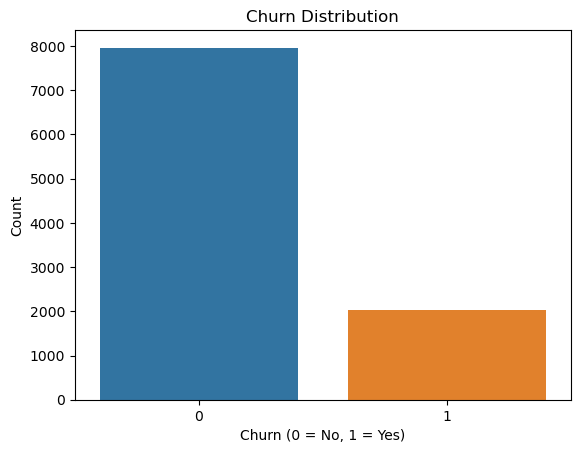

In [4]:
# Count of churned vs non-churned
print("Churn value counts: \n", df['churn'].value_counts())

# Plot churn distribution
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

### View Column Names

In [5]:
print("Column names:")
print(df.columns.tolist())

Column names:
['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


## Data Cleaning and Perprocessing

### Drop Irrelevant Columns

In [6]:
df = df.drop(columns=['customer_id'])

### Handle Categorical Variables

In [7]:
# Encoder Gender (binary)

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

#One-Hot Encode Country
df = pd.get_dummies(df, columns=['country'], drop_first=True)

### Check and Handle Class Imbalance (Optional for now)

In [8]:
print(df['churn'].value_counts(normalize=True))

churn
0    0.7963
1    0.2037
Name: proportion, dtype: float64


### Scale Numerical Fetures

In [9]:
# Separate Feature and Target

X = df.drop('churn', axis=1)
y = df['churn']

In [10]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Apply StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Data Visualization (EDA)

### Distribution of Target Variable

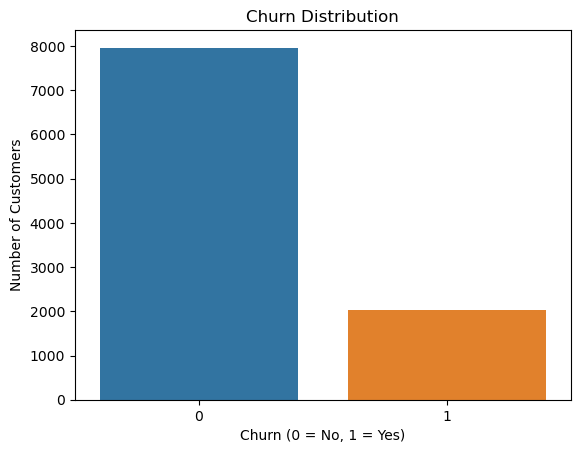

In [12]:
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Number of Customers')
plt.show()

### Churn Rate by Gender

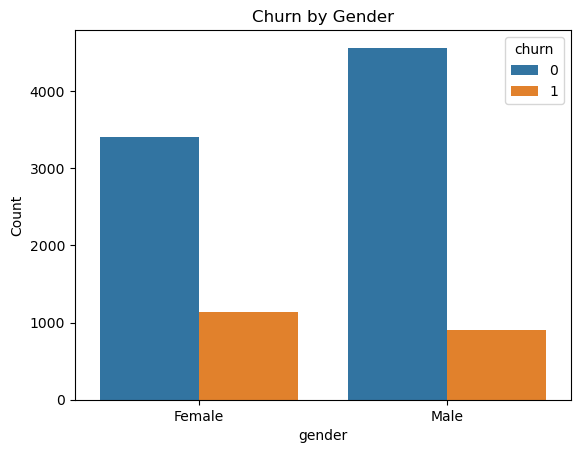

In [13]:
sns.countplot(x='gender', hue='churn', data=df)
plt.title('Churn by Gender')
plt.xticks([0,1], ['Female', 'Male'])
plt.ylabel('Count')
plt.show()

### Churn Rate by Country

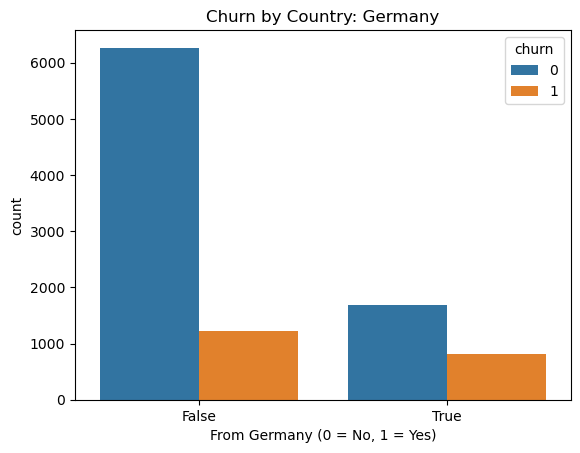

In [14]:
sns.countplot(x='country_Germany', hue='churn', data=df)
plt.title('Churn by Country: Germany')
plt.xlabel('From Germany (0 = No, 1 = Yes)')
plt.show()

### Boxplot for Numerical Features

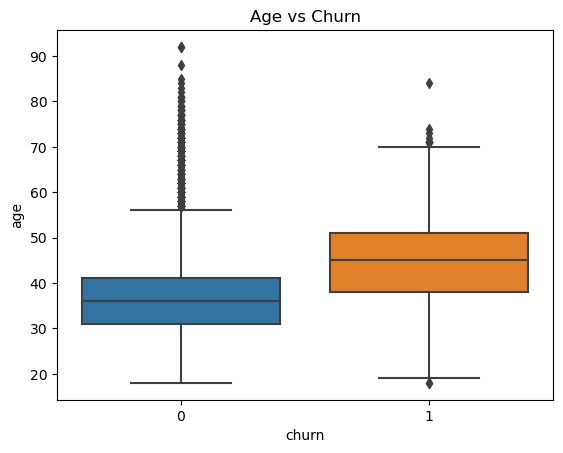

In [15]:
# Age vs Churn

sns.boxplot(x='churn', y='age', data=df)
plt.title('Age vs Churn')
plt.show()

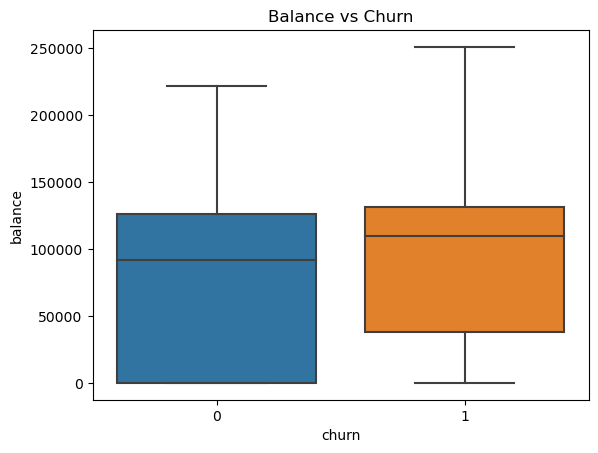

In [16]:
# Balance vs Churn

sns.boxplot(x='churn', y='balance', data=df)
plt.title('Balance vs Churn')
plt.show()

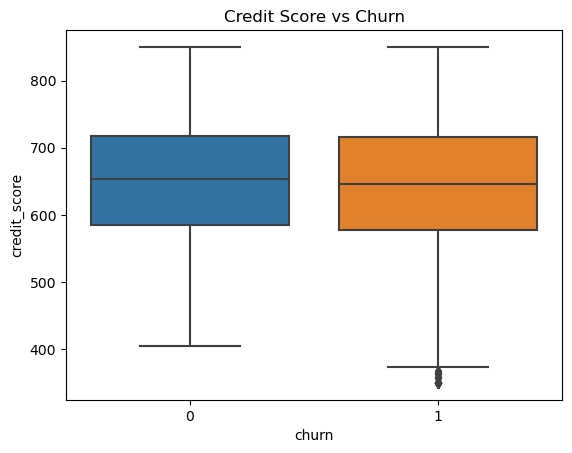

In [17]:
# Credit Score vs Churn

sns.boxplot(x='churn', y='credit_score', data=df)
plt.title('Credit Score vs Churn')
plt.show()

### Count Plots for Binary Features

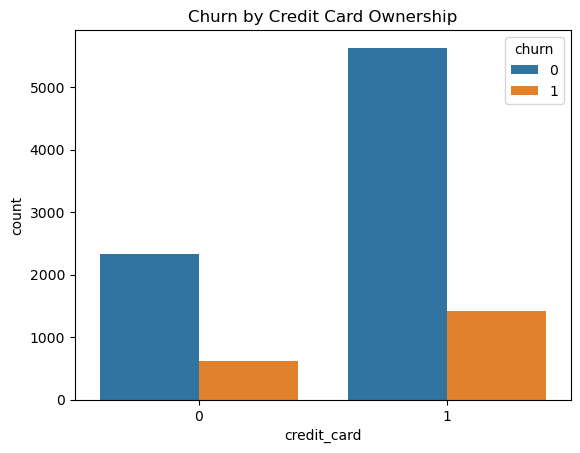

In [18]:
# Credit Card Ownership vs Churn

sns.countplot(x='credit_card', hue='churn', data=df)
plt.title('Churn by Credit Card Ownership')
plt.show()

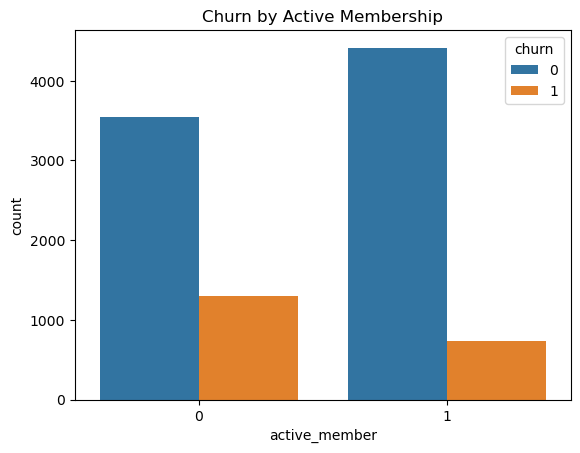

In [19]:
# Active Member vs Churn

sns.countplot(x='active_member', hue='churn', data=df)
plt.title('Churn by Active Membership')
plt.show()

### Correlationship Heatmap

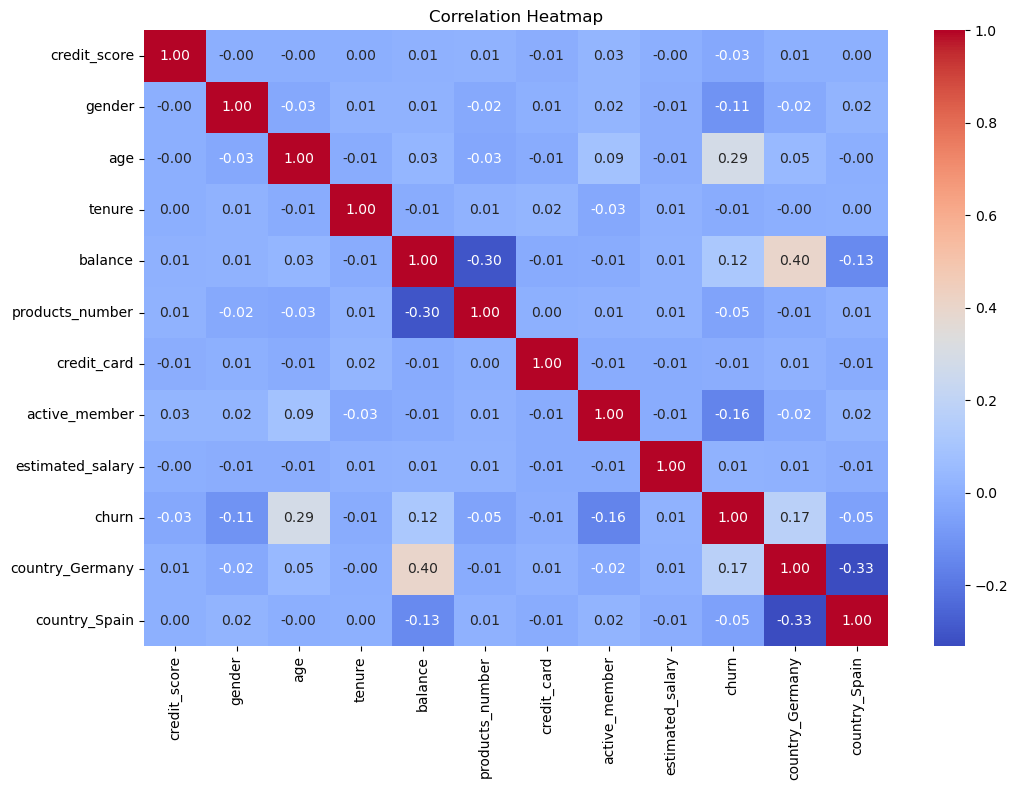

In [20]:
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Build and Train Machine Learning Models

### Set up and the Data

In [21]:
X_train_scaled, X_test_scaled, y_train, y_test

(array([[ 1.058568  ,  0.90750738,  1.71508648, ...,  1.04208392,
         -0.57831252, -0.57773517],
        [ 0.91362605,  0.90750738, -0.65993547, ..., -0.62355635,
          1.72916886, -0.57773517],
        [ 1.07927399, -1.10191942, -0.18493108, ...,  0.30812779,
          1.72916886, -0.57773517],
        ...,
        [ 0.16821031, -1.10191942, -0.18493108, ..., -0.55808767,
         -0.57831252, -0.57773517],
        [ 0.37527024,  0.90750738, -0.37493284, ..., -1.35149956,
         -0.57831252,  1.73089688],
        [ 1.56586482,  0.90750738,  1.14508121, ..., -1.02692216,
         -0.57831252,  1.73089688]]),
 array([[-0.68073539,  0.90750738, -0.27993196, ..., -0.09502138,
         -0.57831252, -0.57773517],
        [-1.30191518,  0.90750738, -0.5649346 , ..., -0.778941  ,
          1.72916886, -0.57773517],
        [-0.97061929, -1.10191942,  0.10007155, ...,  0.09946914,
         -0.57831252,  1.73089688],
        ...,
        [-1.39509214, -1.10191942,  0.7650777 , ...,  

### Train Multiple Models

In [22]:
# Logical Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression: \n", classification_report(y_test, y_pred_logreg))

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [23]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest: \n", classification_report(y_test, y_pred_rf))

Random Forest: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



In [24]:
# XGBoost

!pip install xgboost

from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("XGBoost: \n", classification_report(y_test, y_pred_xgb))

Defaulting to user installation because normal site-packages is not writeable


C:\Users\thili\AppData\Roaming\Python\Python310\site-packages\xgboost\training.py:183: UserWarning: [17:35:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1593
           1       0.68      0.48      0.56       407

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



LogReg AUC: 0.7747778595236223
RF AUC: 0.8542618118889306
XGB AUC: 0.8328343752072566


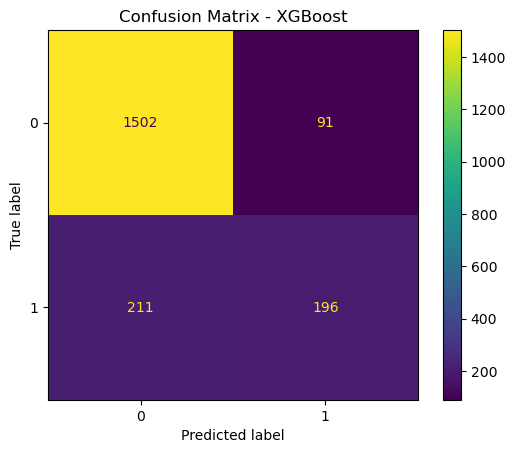

In [25]:
# Evaluate with ROC-AUC and Confusion Matrix

from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# ROC-AUC
print("LogReg AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test_scaled)[:, 1]))
print("RF AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:, 1]))
print("XGB AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:, 1]))

# Confusion Matrix for best model (e.g., XGB)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
plt.title("Confusion Matrix - XGBoost")
plt.show()


| Model               | Precision | Recall | F1-Score | ROC-AUC |
|---------------------|-----------|--------|----------|---------|
| Logistic Regression | 0.82      | 0.97   | 0.89     | 0.77    |
| Random Forest       | 0.87      | 0.97   | 0.92     | 0.85    |
| XGBoost             | 0.88      | 0.94   | 0.91     | 0.83    |


## Model Interpretation (Feature Importance & SHAP)

### Feature Importance (for Tree_Based Models)

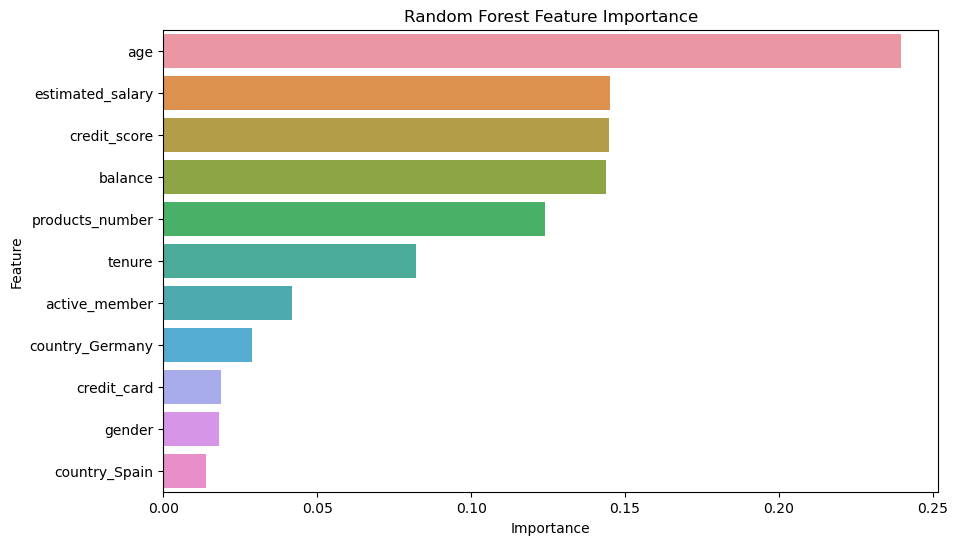

In [26]:
# For Random Forest
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns  # use original column names
importances = rf.feature_importances_
rf_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

In [27]:
xgb_importances = xgb.feature_importances_
xgb_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': xgb_importances})


### SHAP (Model-Agnostic & More Precise)

In [28]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


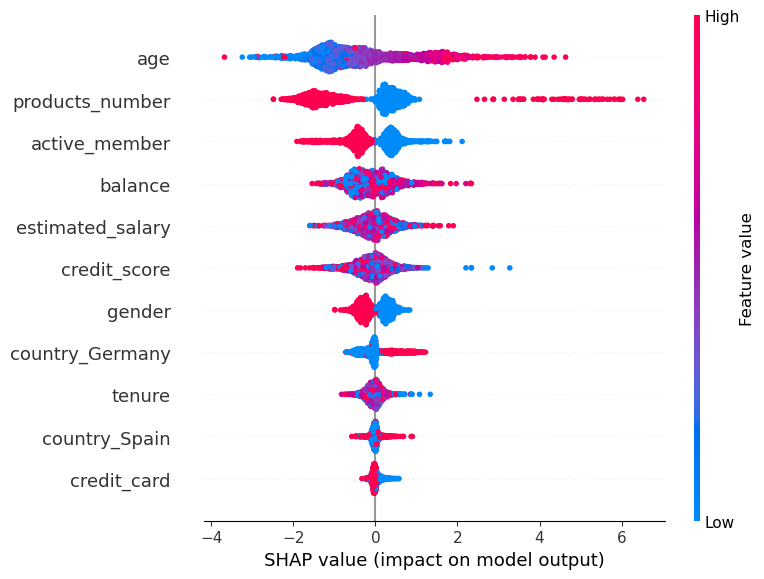

In [29]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test_scaled)

# Summary plot
shap.summary_plot(shap_values, X_test_scaled, feature_names=feature_names)

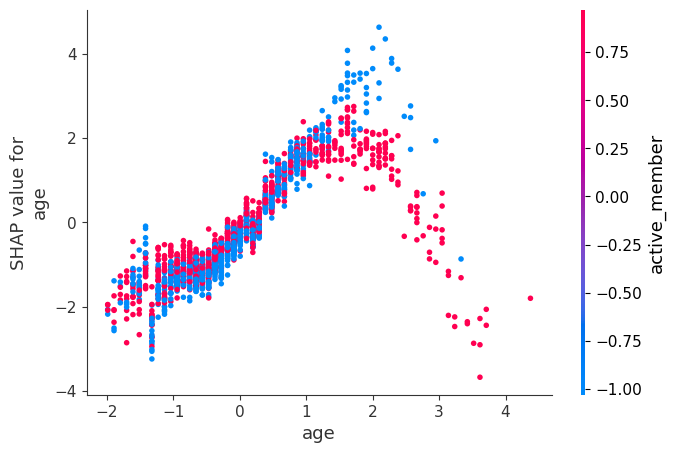

In [30]:
# How 'age' affects prediction
shap.dependence_plot("age", shap_values.values, X_test_scaled, feature_names=feature_names)


In [31]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [32]:
import joblib

joblib.dump(xgb, "xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']